<a href="https://colab.research.google.com/github/bforoura/AI/blob/main/Module6/iris_perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The Iris Dataset**

* The Iris Dataset contains four features (length and width of sepals and petals) of 50 samples of three species of Iris (Iris setosa, Iris virginica and Iris versicolor).

* These measures are used to create a linear discriminant model to classify the species.

* The dataset is often used in data mining, classification and clustering examples and to test algorithms.

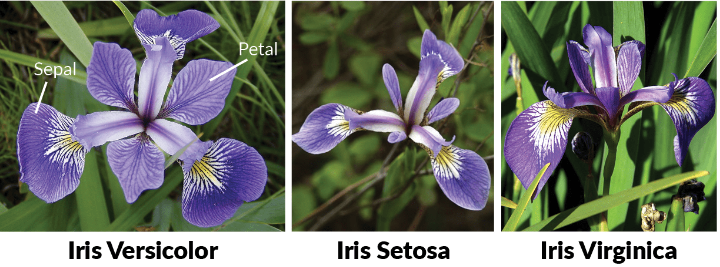

In [73]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt


# Load the data set
iris = load_iris()

# Extract input vector of size 150x2
X = iris.data[:, (2, 3)]  # petal length (PL), petal width (PW)

# Create the expected output vector of size 150X1
y = (iris.target == 0).astype(int)  # Iris setosa?



## **Examining the dataset**

In [74]:
# Let's  the first 10 training data points -- rows 0-9 and the four features in cols 0,1,2,3

iris.data[0:9, 0:4]


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2]])

In [75]:
# What is the dimensionality of X?

print(X.shape)


(150, 2)


In [76]:
# Let's look at the three target classes: Setosa, Versicolor, Virginca are coded as 0, 1, and 2, respectively

iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [77]:
# Binarized target y ==> Setosa vs. non-Setosa

y


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## **Train the Perceptron model on the Dataset**

In [78]:
# Create the perceptron classifier model
# See https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html

# max_iter defines the number of times the model is trained on the entire dataset (epochs), and eta0 is the learning parameter.
per_clf = Perceptron(max_iter=1000, eta0=0.1)

# Train the model
per_clf.fit(X, y)


# Test the model to see how it classifies a test case
y_pred = per_clf.predict([[2, 0.5]])

print(y_pred)


[0]


## **The Trained Models' Parameters and Accuracy**

In [79]:
# Retrieve the weights assigned to the features (inputs)

print(per_clf.coef_)


[[-0.07 -0.12]]


In [80]:
# Retrieve the bias in the decision function

print(per_clf.intercept_)


[0.2]


In [61]:
# What is the trained model's accuracy score (classification accuracy) on the entire training set X?

print(per_clf.score(X, y))


1.0


## **The Trained Perceptron's Decision Function**

* (-0.07 * PL) + (-0.12 * PW) + 0.2 = 0

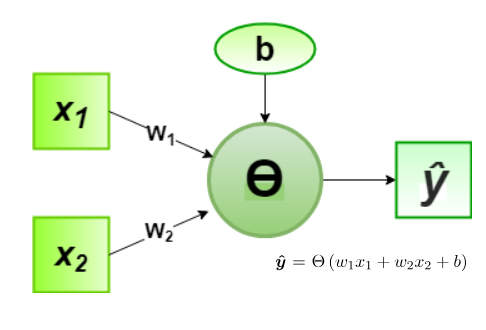

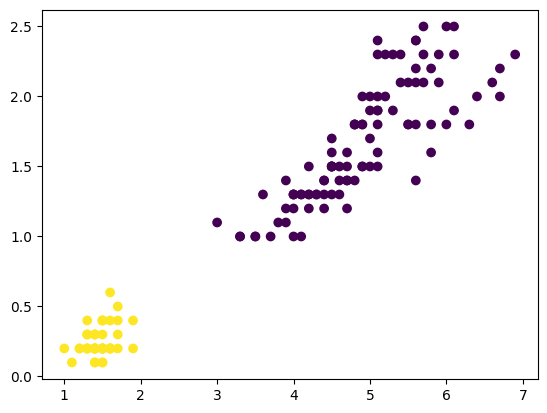

In [ ]:
# Let's do a scatter plot of the data points

plt.scatter(X[:, 0], X[:, 1], c=y)


In [63]:
# Find out min and max values for the two features PL & PW

x_min, x_max = X[:, 0].min(), X[:, 0].max()
y_min, y_max = X[:, 1].min(), X[:, 1].max()

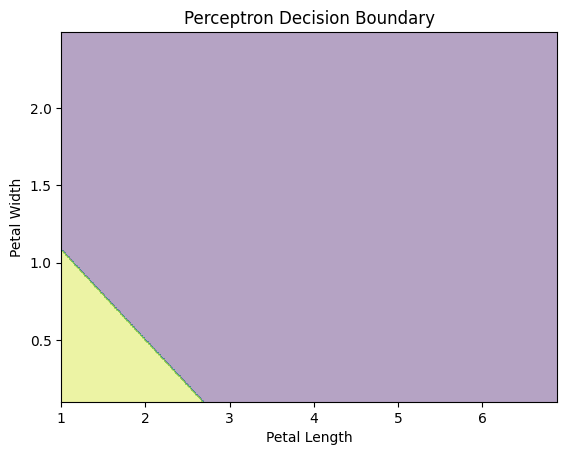

In [65]:
# Draw the decision boundary and label the axes

# Meshgrid turns NumPy arrays into  matrices or grids of values
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Evaluate and plot the entire mesh
Z = per_clf.predict(np.c_[xx.ravel(), yy.ravel()])

# The reshape() function in Python is used to change the shape of an array
# Here, the reshaping is necessay for contour plotting
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)

plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

plt.title('Perceptron Decision Boundary')

plt.show()